**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from scipy.spatial.distance import minkowski as minkowski
from scipy.spatial.distance import cdist as cdist

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):  # used metric is Minkowski, default p=2
        self.k = n_neighbors
        self.algorithm = algorithm
        self.metric=metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
            
    def predict(self, X):
        if self.algorithm == 'brute':
            X_shape = X.shape[0]
            X_train_shape = self.X_train.shape[0]
            dists = np.zeros((X_shape, X_train_shape))
            dists = cdist(X, self.X_train, self.metric)
            y_pred = np.zeros(X_shape)
            for i in range(X_shape):
                y_indices = np.argsort(dists[i, :])
                k_closest = self.y_train[y_indices[:self.k]].astype(int)
                y_pred[i] = np.argmax(np.bincount(k_closest))
        elif self.algorithm == "kd_tree":
            X_shape = X.shape[0]
            tree = KDTree(self.X_train)
            dists, y_indices = tree.query(X, k=self.k)
            y_pred = np.zeros(X_shape)
            for i in range(X_shape):
                k_closest = self.y_train[y_indices[i]].astype(int)
                y_pred[i] = np.argmax(np.bincount(k_closest))
            
        return y_pred.astype(int)
 

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 1e+03 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0])

In [11]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 3 ms


array([2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 997 µs


array([2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]
    my_clf.fit(X_train, y_train)
    y_pred = my_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.176033934252386
0.1824449748077433
0.1699814372845399


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
def kestimation(metric):
    scores = []
    kf = KFold(n_splits=3)
    for i in range(1, 11):
        my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric=metric)
        accuracy = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = target[train_index], target[test_index]
            my_clf.fit(X_train, y_train)
            y_pred = my_clf.predict(X_test)
            accuracy.append(accuracy_score(y_test, y_pred))
        accuracy = np.mean(accuracy)
        scores.append(accuracy)
        print(f"k = {i}, score = {accuracy}")
    return scores

In [24]:
minkowski_basic_scores = kestimation('minkowski')

k = 1, score = 0.18490369331765677
k = 2, score = 0.1761534487815564
k = 3, score = 0.17456224171387022
k = 4, score = 0.1746509402418918
k = 5, score = 0.1741209987590174
k = 6, score = 0.1753585131230234
k = 7, score = 0.1798662730842313
k = 8, score = 0.1806618649009637
k = 9, score = 0.18322502973568355
k = 10, score = 0.18225260328422177


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [25]:
cosine_basic_scores = kestimation('cosine')

k = 1, score = 0.2576445945359457
k = 2, score = 0.25022046915498725
k = 3, score = 0.24748007130377414
k = 4, score = 0.24818729267158468
k = 5, score = 0.24880609672203047
k = 6, score = 0.24792243910125453
k = 7, score = 0.24809910969643403
k = 8, score = 0.2496898949481349
k = 9, score = 0.25075092619073264
k = 10, score = 0.2510162953139337


In [27]:
Tfdifvectorizer = TfidfVectorizer(max_features=1500)
X = Tfdifvectorizer.fit_transform(data).toarray()

In [28]:
minkowski_tfdif_scores = kestimation('minkowski')

k = 1, score = 0.2422653477511912
k = 2, score = 0.20638080572289932
k = 3, score = 0.19073630698605074
k = 4, score = 0.18322367055084202
k = 5, score = 0.1798647264256185
k = 6, score = 0.17668320279065955
k = 7, score = 0.17305905358178478
k = 8, score = 0.17040770577191436
k = 9, score = 0.16819806960132486
k = 10, score = 0.16501612415038058


In [29]:
cosine_tfdif_scores = kestimation('cosine')

k = 1, score = 0.4407810897831575
k = 2, score = 0.42275040145164694
k = 3, score = 0.43424085636518917
k = 4, score = 0.4382187920146297
k = 5, score = 0.4445824954427469
k = 6, score = 0.4499733974718599
k = 7, score = 0.45280157991645975
k = 8, score = 0.45545334954231564
k = 9, score = 0.4579283782703276
k = 10, score = 0.46049168371037585


Text(0, 0.5, 'Mean accuracy')

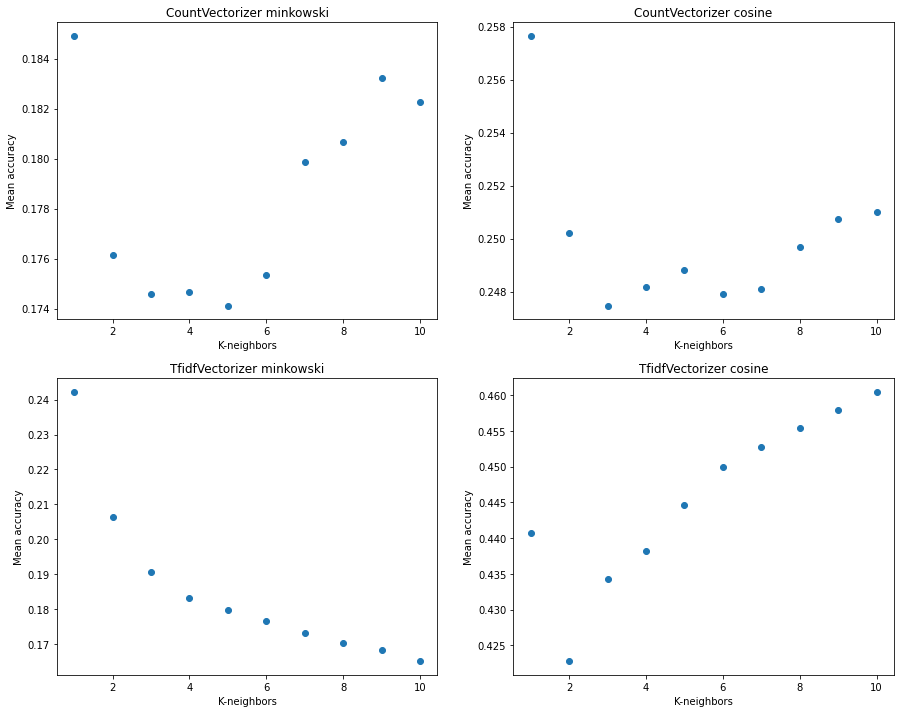

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
ax1.scatter(range(1, 11), minkowski_basic_scores)
ax1.set_title('CountVectorizer minkowski')
ax1.set_xlabel('K-neighbors')
ax1.set_ylabel('Mean accuracy')
ax2.scatter(range(1, 11), cosine_basic_scores)
ax2.set_title('CountVectorizer cosine')
ax2.set_xlabel('K-neighbors')
ax2.set_ylabel('Mean accuracy')
ax3.scatter(range(1, 11), minkowski_tfdif_scores)
ax3.set_title('TfidfVectorizer minkowski')
ax3.set_xlabel('K-neighbors')
ax3.set_ylabel('Mean accuracy')
ax4.scatter(range(1, 11), cosine_tfdif_scores)
ax4.set_title('TfidfVectorizer cosine')
ax4.set_xlabel('K-neighbors')
ax4.set_ylabel('Mean accuracy')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [58]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [63]:
test_data = newsgroups['data']
test_target = newsgroups['target']

Tfidfvectorizer = TfidfVectorizer(max_features=1500)
X_train = Tfidfvectorizer.fit_transform(data).toarray()

test_Tfidf_vectorizer = TfidfVectorizer(vocabulary=Tfidfvectorizer.get_feature_names())
X_test = test_Tfidf_vectorizer.fit_transform(test_data).toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [64]:
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
my_clf.fit(X_train, target)
prediction = my_clf.predict(X_test)
accuracy_score(prediction, test_target)

0.42193308550185876

---
**Результат:** точность на тестовой выборке получилась хуже, чем на валидационной. Использовался словарь от тренировочной выборки, а оптимальное число соседей подбиралось по валидационной (вдруг не оптимально для тестовой).
Кроме того, хотелось отметить, что понижение фич в векторайзерах ухудшило точность. Понижать пришлось, так как не удавалось подгрузить полученные массивы, а sparse-матрица (результат `vectorizer.fir_transform(data)`) не работает в алгоритме "brute" для *scipy.spatial.distance.cdist*.